In [56]:
import heapq
from collections import defaultdict, deque
import time
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v, weight=1):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))  # Assuming undirected graph

    def dfs(self, start):
        visited = set()
        result = []

        def _dfs(v):
            if v not in visited:
                visited.add(v)
                result.append(v)
                for neighbor, _ in self.graph[v]:
                    _dfs(neighbor)

        _dfs(start)
        return result

    def bfs(self, start):
        visited = set()
        queue = deque([start])
        result = []

        while queue:
            node = queue.popleft()
            if node not in visited:
                visited.add(node)
                result.append(node)
                for neighbor, _ in self.graph[node]:
                    if neighbor not in visited:
                        queue.append(neighbor)

        return result

    def dijkstra(self, start):
        distances = {node: float('inf') for node in self.graph}
        distances[start] = 0
        priority_queue = [(0, start)]

        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)

            if current_distance > distances[current_node]:
                continue

            for neighbor, weight in self.graph[current_node]:
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(priority_queue, (distance, neighbor))

        return distances

## Representing the urban transportation network

In [58]:
transport_graph = Graph()
edges = [
    ("A", "B", 2), ("A", "C", 4), ("B", "D", 7),
    ("C", "D", 1), ("B", "E", 3), ("D", "E", 2),
    ("C", "F", 5), ("D", "F", 8), ("E", "F", 6)
]

for u, v, weight in edges:
    transport_graph.add_edge(u, v, weight)

# Running algorithms
start_node = "A"

# Depth-First Search
start_time = time.time()
dfs_result = transport_graph.dfs(start_node)
dfs_time = time.time() - start_time

# Breadth-First Search
start_time = time.time()
bfs_result = transport_graph.bfs(start_node)
bfs_time = time.time() - start_time

# Dijkstra's Algorithm
start_time = time.time()
dijkstra_result = transport_graph.dijkstra(start_node)
dijkstra_time = time.time() - start_time

# Results
print("DFS Result:", dfs_result)
print("DFS Time:", dfs_time, "seconds")

print("BFS Result:", bfs_result)
print("BFS Time:", bfs_time, "seconds")

print("Dijkstra's Shortest Paths:", dijkstra_result)
print("Dijkstra Time:", dijkstra_time, "seconds")

# Analyzing efficiency and complexity
print("\nEfficiency and Complexity Analysis:")
print("DFS Complexity: O(V + E), where V is vertices and E is edges.")
print("BFS Complexity: O(V + E), similar to DFS but uses a queue.")
print("Dijkstra's Complexity: O((V + E) log V) with a priority queue.")

DFS Result: ['A', 'B', 'D', 'C', 'F', 'E']
DFS Time: 0.0 seconds
BFS Result: ['A', 'B', 'C', 'D', 'E', 'F']
BFS Time: 0.0 seconds
Dijkstra's Shortest Paths: {'A': 0, 'B': 2, 'C': 4, 'D': 5, 'E': 5, 'F': 9}
Dijkstra Time: 0.0 seconds

Efficiency and Complexity Analysis:
DFS Complexity: O(V + E), where V is vertices and E is edges.
BFS Complexity: O(V + E), similar to DFS but uses a queue.
Dijkstra's Complexity: O((V + E) log V) with a priority queue.


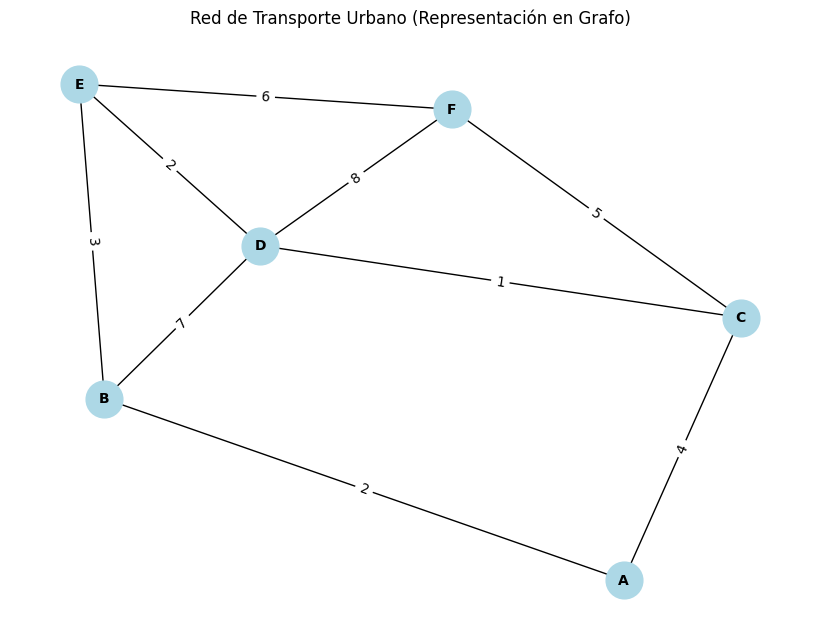

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

# Creando el grafo con NetworkX para la visualización
G = nx.Graph()

# Añadiendo aristas y pesos
edges = [
    ("A", "B", 2), ("A", "C", 4), ("B", "D", 7),
    ("C", "D", 1), ("B", "E", 3), ("D", "E", 2),
    ("C", "F", 5), ("D", "F", 8), ("E", "F", 6)
]
for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

# Dibujando el grafo con etiquetas de pesos
pos = nx.spring_layout(G)  # Posicionando los nodos para una disposición clara
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Red de Transporte Urbano (Representación en Grafo)")
plt.show()


In [60]:
import heapq

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, from_node, to_node, weight):
        if from_node not in self.graph:
            self.graph[from_node] = []
        if to_node not in self.graph:
            self.graph[to_node] = []
        self.graph[from_node].append((to_node, weight))
        self.graph[to_node].append((from_node, weight))  # Si el grafo es no dirigido

    def dijkstra(self, start):
        # Verifica si el nodo inicial existe en el grafo
        if start not in self.graph:
            raise ValueError(f"El nodo inicial '{start}' no existe en el grafo.")

        # Inicializa las distancias y la cola de prioridad
        distances = {node: float('inf') for node in self.graph}
        distances[start] = 0
        priority_queue = [(0, start)]

        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)

            # Si ya tenemos una mejor distancia, ignoramos esta entrada
            if current_distance > distances[current_node]:
                continue

            # Procesa cada vecino del nodo actual
            for neighbor, weight in self.graph[current_node]:
                if neighbor not in self.graph:
                    raise ValueError(f"El vecino '{neighbor}' no existe en el grafo.")

                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(priority_queue, (distance, neighbor))

        return distances

    def print_graph(self):
        # Imprime la estructura del grafo para depuración
        for node, edges in self.graph.items():
            print(f"{node}: {edges}")


# Ejemplo de uso
g = Graph()
g.add_edge('A', 'B', 2)
g.add_edge('A', 'C', 4)
g.add_edge('B', 'D', 7)
g.add_edge('B', 'E', 3)
g.add_edge('C', 'F', 5)
g.add_edge('D', 'E', 2)
g.add_edge('D', 'F', 8)
g.add_edge('E', 'F', 6)

# Imprime el grafo
print("Estructura del Grafo:")
g.print_graph()

# Ejecuta Dijkstra desde el nodo 'A'
print("\nDistancias desde 'A':")
distances = g.dijkstra('A')
print(distances)


Estructura del Grafo:
A: [('B', 2), ('C', 4)]
B: [('A', 2), ('D', 7), ('E', 3)]
C: [('A', 4), ('F', 5)]
D: [('B', 7), ('E', 2), ('F', 8)]
E: [('B', 3), ('D', 2), ('F', 6)]
F: [('C', 5), ('D', 8), ('E', 6)]

Distancias desde 'A':
{'A': 0, 'B': 2, 'C': 4, 'D': 7, 'E': 5, 'F': 9}


Distancias desde 'A': {'A': 0, 'B': 2, 'C': 4, 'D': 9, 'E': 5, 'F': 9}
Ruta más corta de 'A' a 'E': [('A', 'B'), ('B', 'E')]


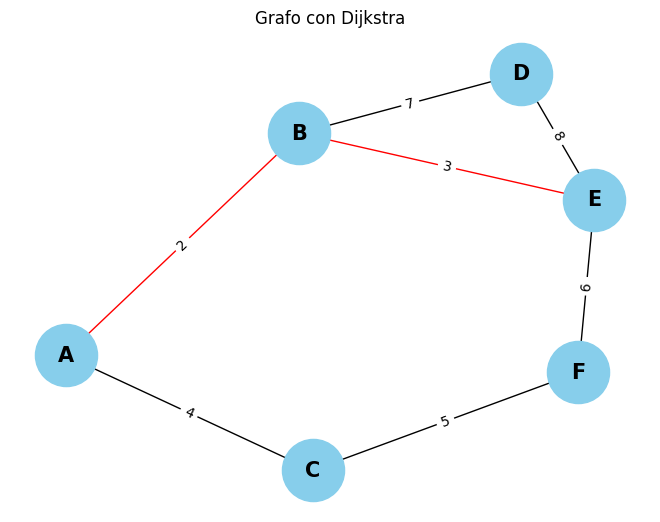

In [69]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Definimos el grafo como un diccionario
graph = {
    'A': {'B': 2, 'C': 4},
    'B': {'A': 2, 'E': 3, 'D': 7},
    'C': {'A': 4, 'F': 5},
    'D': {'B': 7, 'E': 8},
    'E': {'B': 3, 'D': 8, 'F': 6},
    'F': {'C': 5, 'E': 6}
}

# Función de Dijkstra
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}  # Distancias iniciales infinitas
    distances[start] = 0  # Distancia al nodo inicial es 0
    priority_queue = [(0, start)]  # Cola de prioridad
    previous_nodes = {node: None for node in graph}  # Para reconstruir la ruta

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        # Si encontramos una distancia mayor, la ignoramos
        if current_distance > distances[current_node]:
            continue

        # Evaluamos los vecinos
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            # Si encontramos una distancia más corta
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, previous_nodes

# Reconstrucción de la ruta más corta
def get_shortest_path(previous_nodes, start, end):
    path = []
    current_node = end
    while current_node != start:
        path.insert(0, (previous_nodes[current_node], current_node))
        current_node = previous_nodes[current_node]
    return path

# Visualización del grafo y la ruta más corta
def visualize_graph(graph, shortest_path):
    G = nx.Graph()
    
    # Añadimos los nodos y aristas con sus pesos
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    
    # Configuración de colores para la ruta más corta
    edge_colors = []
    for edge in G.edges():
        if edge in shortest_path or (edge[1], edge[0]) in shortest_path:
            edge_colors.append('red')  # Ruta más corta
        else:
            edge_colors.append('black')  # Otras rutas

    # Posición de los nodos
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    # Dibujamos el grafo
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold', edge_color=edge_colors)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Grafo con Dijkstra")
    plt.show()

# Ejecución del algoritmo de Dijkstra desde el nodo 'A'
start_node = 'A'
distances, previous_nodes = dijkstra(graph, start_node)

# Mostramos las distancias más cortas
print(f"Distancias desde '{start_node}': {distances}")

# Ruta más corta al nodo 'F'
end_node = 'E'
shortest_path = get_shortest_path(previous_nodes, start_node, end_node)
print(f"Ruta más corta de '{start_node}' a '{end_node}': {shortest_path}")

# Visualizamos el grafo con la ruta más corta
visualize_graph(graph, shortest_path)


Distancias desde 'F': {'A': 9, 'B': 9, 'C': 5, 'D': 14, 'E': 6, 'F': 0}
Ruta más corta de 'F' a 'A': [('F', 'C'), ('C', 'A')]


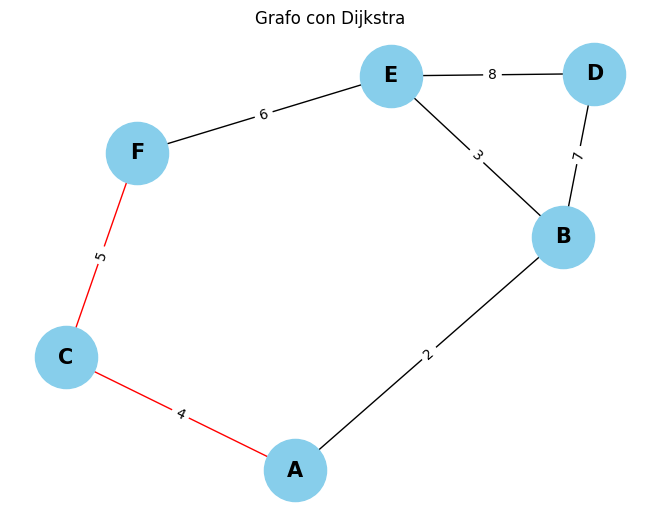

In [70]:
# Ejecución del algoritmo de Dijkstra desde el nodo 'A'
start_node = 'F'
distances, previous_nodes = dijkstra(graph, start_node)

# Mostramos las distancias más cortas
print(f"Distancias desde '{start_node}': {distances}")

# Ruta más corta al nodo 'F'
end_node = 'A'
shortest_path = get_shortest_path(previous_nodes, start_node, end_node)
print(f"Ruta más corta de '{start_node}' a '{end_node}': {shortest_path}")

# Visualizamos el grafo con la ruta más corta
visualize_graph(graph, shortest_path)

Distancias desde 'A': {'A': 0, 'B': 2, 'C': 4, 'D': 9, 'E': 5, 'F': 9}
Ruta más corta de 'A' a 'E': [('A', 'B'), ('B', 'E')]


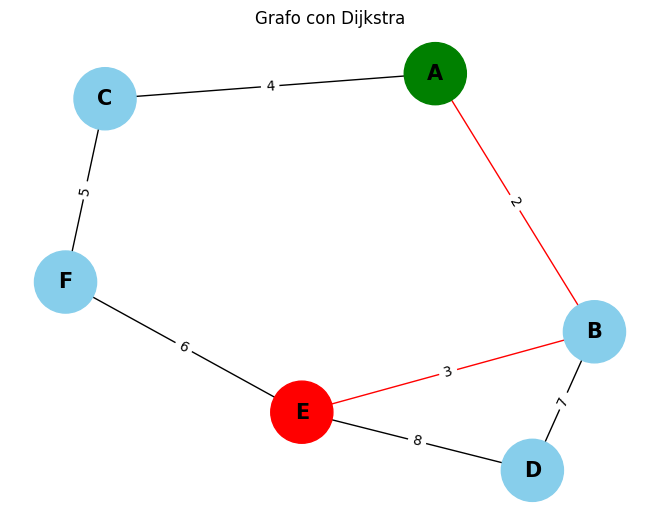

In [86]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Definimos el grafo como un diccionario
graph = {
    'A': {'B': 2, 'C': 4},
    'B': {'A': 2, 'E': 3, 'D': 7},
    'C': {'A': 4, 'F': 5},
    'D': {'B': 7, 'E': 8},
    'E': {'B': 3, 'D': 8, 'F': 6},
    'F': {'C': 5, 'E': 6}
}

# Función de Dijkstra
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}  # Distancias iniciales infinitas
    distances[start] = 0  # Distancia al nodo inicial es 0
    priority_queue = [(0, start)]  # Cola de prioridad
    previous_nodes = {node: None for node in graph}  # Para reconstruir la ruta

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        # Si encontramos una distancia mayor, la ignoramos
        if current_distance > distances[current_node]:
            continue

        # Evaluamos los vecinos
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            # Si encontramos una distancia más corta
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, previous_nodes

# Reconstrucción de la ruta más corta
def get_shortest_path(previous_nodes, start, end):
    path = []
    current_node = end
    while current_node != start:
        path.insert(0, (previous_nodes[current_node], current_node))
        current_node = previous_nodes[current_node]
    return path

# Visualización del grafo y la ruta más corta
def visualize_graph(graph, shortest_path, start_node, end_node):
    G = nx.Graph()
    
    # Añadimos los nodos y aristas con sus pesos
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    
    # Configuración de colores para la ruta más corta
    edge_colors = []
    for edge in G.edges():
        if edge in shortest_path or (edge[1], edge[0]) in shortest_path:
            edge_colors.append('red')  # Ruta más corta
        else:
            edge_colors.append('black')  # Otras rutas

    # Configuración de colores para los nodos
    node_colors = []
    for node in G.nodes():
        if node == start_node:
            node_colors.append('green')  # Nodo inicial
        elif node == end_node:
            node_colors.append('red')  # Nodo final
        else:
            node_colors.append('skyblue')  # Otros nodos

    # Posición de los nodos
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    # Dibujamos el grafo
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=15, font_weight='bold', edge_color=edge_colors)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Grafo con Dijkstra")
    plt.show()

# Ejecución del algoritmo de Dijkstra desde el nodo 'A'
start_node = 'A'
distances, previous_nodes = dijkstra(graph, start_node)

# Mostramos las distancias más cortas
print(f"Distancias desde '{start_node}': {distances}")

# Ruta más corta al nodo 'E'
end_node = 'E'
shortest_path = get_shortest_path(previous_nodes, start_node, end_node)
print(f"Ruta más corta de '{start_node}' a '{end_node}': {shortest_path}")

# Visualizamos el grafo con la ruta más corta
visualize_graph(graph, shortest_path, start_node, end_node)
